In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [14, 18]
plt.rcParams['figure.dpi'] = 100

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
# import tensorflow as tf
from tensorflow import keras as K
from tensorflow.keras import regularizers

In [ ]:
train = 'gdrive/Shareddrives/MO286 - Visualização de Dados/data_images/train_val_test_datasets/16_slices_node_cls/train.pkl'
test = 'gdrive/Shareddrives/MO286 - Visualização de Dados/data_images/train_val_test_datasets/16_slices_node_cls/test.pkl'
val = 'gdrive/Shareddrives/MO286 - Visualização de Dados/data_images/train_val_test_datasets/16_slices_node_cls/val.pkl'

In [ ]:
train_dataset = pd.read_pickle(train)
val_dataset = pd.read_pickle(val)
test_dataset = pd.read_pickle(test)

In [ ]:
def plot_results(history):

  ax1 = plt.subplot(5, 2, 1)
  ax2 = plt.subplot(5, 2, 2)
  ax3 = plt.subplot(5, 2, 3)
  ax4 = plt.subplot(5, 2, 4)
  ax5 = plt.subplot(5, 2, 5)
  ax6 = plt.subplot(5, 2, 6)
  ax7 = plt.subplot(5, 2, 7)
  ax8 = plt.subplot(5, 2, 8)
  ax9 = plt.subplot(5, 2, 9)
  ax10 = plt.subplot(5, 2, 10)

  for label, hist in history.items():
    ax1.plot(range(len(hist.loss)), hist.iloc[:, 0], label=label)
    ax2.plot(range(len(hist.loss)), hist.iloc[:, 5], label=label)
    ax3.plot(range(len(hist.loss)), hist.iloc[:, 1], label=label)
    ax4.plot(range(len(hist.loss)), hist.iloc[:, 6], label=label)
    ax5.plot(range(len(hist.loss)), hist.iloc[:, 3], label=label)
    ax6.plot(range(len(hist.loss)), hist.iloc[:, 8], label=label)
    ax7.plot(range(len(hist.loss)), hist.iloc[:, 2], label=label)
    ax8.plot(range(len(hist.loss)), hist.iloc[:, 7], label=label)
    ax9.plot(range(len(hist.loss)), hist.iloc[:, 4], label=label)
    ax10.plot(range(len(hist.loss)), hist.iloc[:,9], label=label)

  ax1.set_title(f'Training Loss')
  ax2.set_title(f'Validataion Loss')
  ax3.set_title(f'Training Accuracy')
  ax4.set_title(f'Validataion Accuracy')
  ax5.set_title(f'Training Recall')
  ax6.set_title(f'Validation Recall')
  ax7.set_title(f'Training Precision')
  ax8.set_title(f'Validation Precision')
  ax9.set_title(f'Training AUC')
  ax10.set_title(f'Validation AUC')
  

  ax1.legend()
  ax2.legend()
  ax3.legend()
  ax4.legend()
  ax5.legend()
  ax6.legend()
  ax7.legend()
  ax8.legend()
  ax9.legend()
  ax10.legend()
  plt.show()

In [ ]:
WIDTH = 128
HEIGHT = 128
DEPTH = 16

def resize_slices(slices):
  
  slices = np.array(slices).astype(np.float32)
  slices = np.reshape(slices, (WIDTH, HEIGHT, DEPTH))
  slices = np.expand_dims(slices, axis=3)

  return slices

In [ ]:
# train_dataset.img_volume = train_dataset.img_volume.apply(lambda slices: resize_slices(slices))
# val_dataset.img_volume = val_dataset.img_volume.apply(lambda slices: resize_slices(slices))


train_dataset.slices_a = train_dataset.slices_a.apply(lambda slices: resize_slices(slices))
val_dataset.slices_a = val_dataset.slices_a.apply(lambda slices: resize_slices(slices))
test_dataset.slices_a = test_dataset.slices_a.apply(lambda slices: resize_slices(slices))

train_dataset.slices_b = train_dataset.slices_b.apply(lambda slices: resize_slices(slices))
val_dataset.slices_b = val_dataset.slices_b.apply(lambda slices: resize_slices(slices))
test_dataset.slices_b = test_dataset.slices_b.apply(lambda slices: resize_slices(slices))

train_dataset.slices_c = train_dataset.slices_c.apply(lambda slices: resize_slices(slices))
val_dataset.slices_c = val_dataset.slices_c.apply(lambda slices: resize_slices(slices))
test_dataset.slices_c = test_dataset.slices_c.apply(lambda slices: resize_slices(slices))

In [ ]:
# train_samples = np.stack(train_dataset.img_volume)
# val_samples = np.stack(val_dataset.img_volume)

train_a_samples = np.stack(train_dataset.slices_a)
val_a_samples = np.stack(val_dataset.slices_a)
test_a_samples = np.stack(test_dataset.slices_a)

train_b_samples = np.stack(train_dataset.slices_b)
val_b_samples = np.stack(val_dataset.slices_b)
test_b_samples = np.stack(test_dataset.slices_b)

train_c_samples = np.stack(train_dataset.slices_c)
val_c_samples = np.stack(val_dataset.slices_c)
test_c_samples = np.stack(test_dataset.slices_c)

In [ ]:
# y_train = to_categorical(train_dataset.label)
# y_val = to_categorical(val_dataset.label)

y_train = to_categorical(train_dataset.imv)
y_val = to_categorical(val_dataset.imv)
y_test = to_categorical(test_dataset.imv)

In [ ]:
def get_model(width=128, height=128, depth=50, opt=None, hidden_act='relu', 
              output_act='sigmoid', ini='glorot_uniform', conv_layers=1, dense_layers=1, reg=None):
  """Build a 3D convolutional neural network model."""

  input_a = keras.Input((width, height, depth, 1))
  input_b = keras.Input((width, height, depth, 1))
  input_c = keras.Input((width, height, depth, 1))

  x_a = layers.BatchNormalization()(input_a)
  x_b = layers.BatchNormalization()(input_b)
  x_c = layers.BatchNormalization()(input_c)

  x_a = layers.Conv3D(filters=32, kernel_size=3, activation=hidden_act,
                    padding='same', kernel_initializer=ini, 
                    kernel_regularizer=reg)(x_a)
  x_a = layers.MaxPool3D(pool_size=3, padding='same')(x_a)

  x_b = layers.Conv3D(filters=16, kernel_size=3, activation=hidden_act,
                    padding='same', kernel_initializer=ini, 
                    kernel_regularizer=reg)(x_b)
  x_b = layers.MaxPool3D(pool_size=3, padding='same')(x_b)

  x_c = layers.Conv3D(filters=8, kernel_size=3, activation=hidden_act,
                    padding='same', kernel_initializer=ini, 
                    kernel_regularizer=reg)(x_c)
  x_c = layers.MaxPool3D(pool_size=3, padding='same')(x_c)

  x_a = layers.Dropout(0.3)(x_a)
  x_b= layers.Dropout(0.3)(x_b)
  x_c= layers.Dropout(0.3)(x_c)

  x_a = layers.BatchNormalization()(x_a)
  x_b = layers.BatchNormalization()(x_b)
  x_c = layers.BatchNormalization()(x_c)

  x_a = layers.Flatten()(x_a)
  x_b = layers.Flatten()(x_b)
  x_c = layers.Flatten()(x_c)

  x = layers.concatenate([x_a, x_b, x_c])

  # # if conv_layers > 1:
  # #   x = layers.Conv3D(filters=18, kernel_size=3, activation=hidden_act,
  # #                   padding='same', kernel_initializer=ini, 
  # #                   kernel_regularizer=reg)(x)

  # #   x = layers.MaxPool3D(pool_size=5, padding='same')(x)

  # # x = layers.BatchNormalization()(x)
  # x = layers.Dropout(0.3)(x)
  # x = layers.Flatten()(x)
  
  x = layers.Dense(units=224, kernel_initializer=ini, activation=hidden_act, kernel_regularizer=reg)(x)

  x = layers.Dense(units=128, kernel_initializer=ini, activation=hidden_act, kernel_regularizer=reg)(x)

  # x = layers.Dense(units=64, kernel_initializer=ini, activation=hidden_act, kernel_regularizer=reg)(x)

  if dense_layers > 1:
    x = layers.Dense(units=64, kernel_initializer=ini, activation=hidden_act, kernel_regularizer=reg)(x)
  
  x = layers.Dropout(0.5)(x)

  outputs = layers.Dense(units=2, kernel_initializer=ini, activation=output_act, kernel_regularizer=reg)(x)

  if opt == None:
    opt = K.optimizers.SGD(learning_rate=1e-4, momentum=0.9, decay=1e-6)

  model = keras.Model([input_a, input_b, input_c], outputs, name="3dcnn")

  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=[K.metrics.CategoricalAccuracy(),
                                                                         K.metrics.Precision(), 
                                                                         K.metrics.Recall(),
                                                                         K.metrics.AUC()])

  return model


# Build model.
model = get_model(width=128, height=128, depth=DEPTH)
model.summary()

Model: "3dcnn"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 16 0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 128, 128, 16 0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            [(None, 128, 128, 16 0                                            
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 128, 128, 16, 4           input_1[0][0]                    
______________________________________________________________________________________________

In [ ]:
epochs = 20

baseline = model.fit(
      x=[train_a_samples, train_b_samples, train_c_samples],
      y=y_train,
      batch_size=8,
      callbacks=[keras.callbacks.EarlyStopping(monitor='val_categorical_accuracy', patience=15)],
      validation_data=([val_a_samples, val_b_samples, val_c_samples], y_val),
      epochs=epochs,
      shuffle=True,
      verbose=2
      )

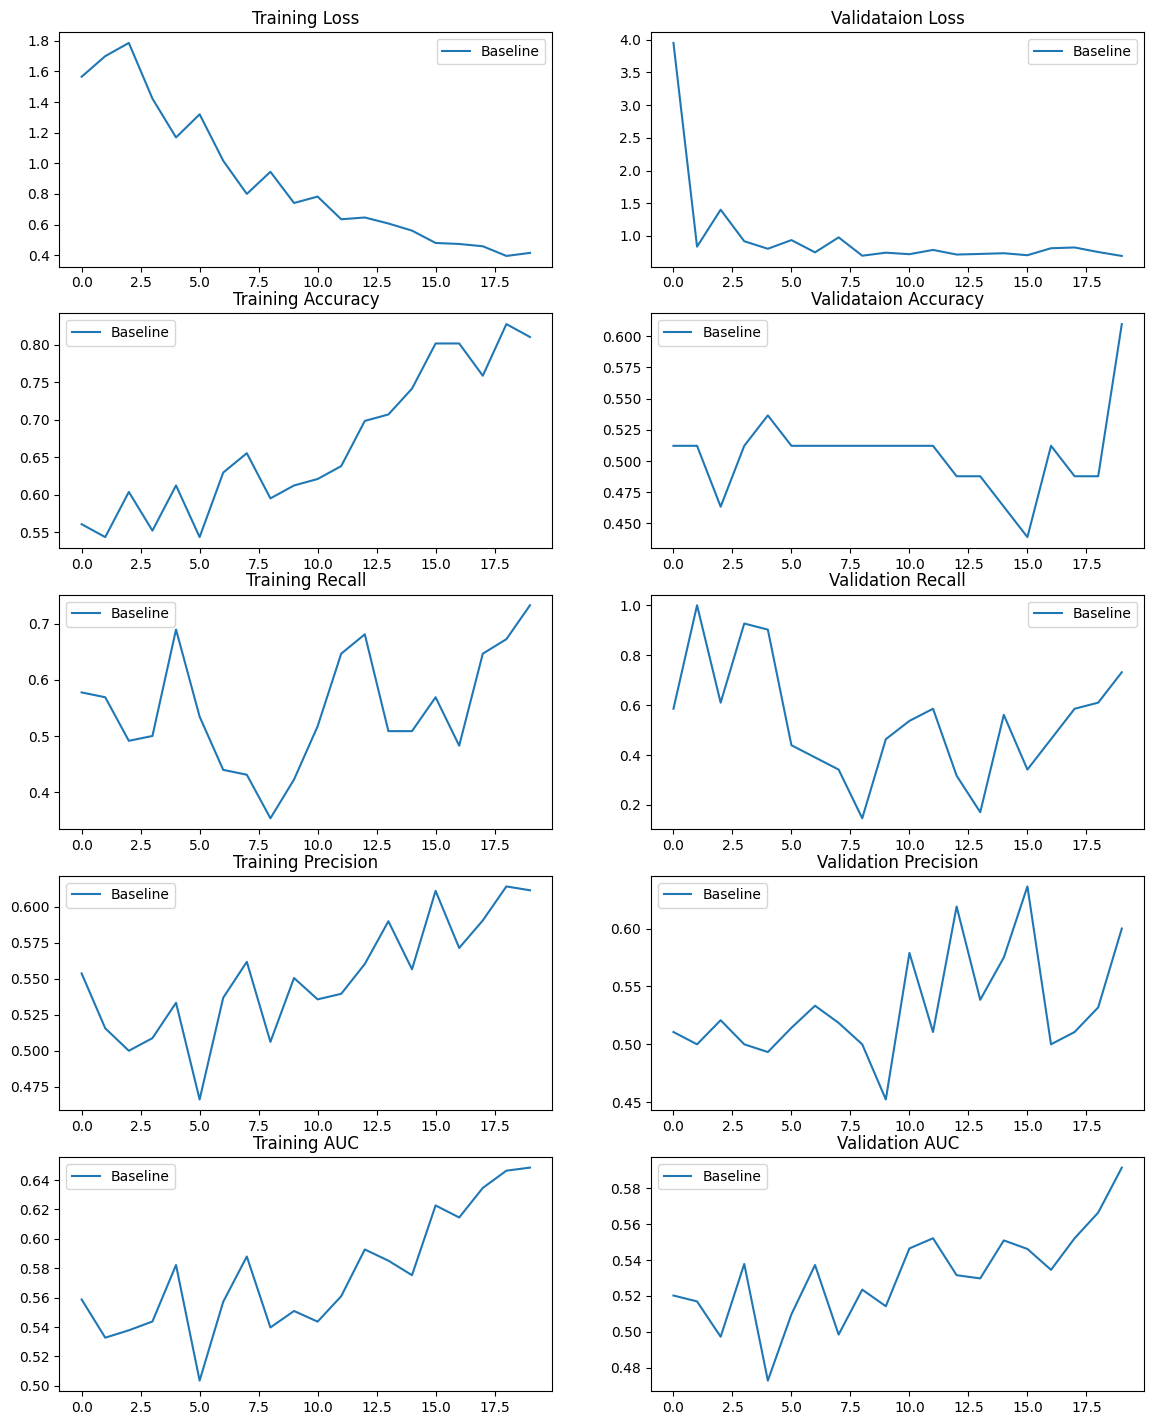

In [ ]:
baseline = {"Baseline": pd.DataFrame.from_dict(baseline.history)}
plot_results(baseline)

### **Try activations**

---

In [ ]:
activations = ['softmax', 'sigmoid', 'tanh']  # Baseline = relu
history = baseline.copy()

for act in activations:
  model = get_model(width=128, height=128, depth=DEPTH, hidden_act=act)
  h = model.fit(
      x=[train_a_samples, train_b_samples, train_c_samples],
      y=y_train,
      batch_size=8,
      callbacks=[keras.callbacks.EarlyStopping(monitor='val_categorical_accuracy', patience=15)],
      validation_data=([val_a_samples, val_b_samples, val_c_samples], y_val),
      epochs=epochs,
      shuffle=True,
      verbose=2
      ) 
  history[act] = pd.DataFrame.from_dict(h.history)

Epoch 1/20
15/15 - 5s - loss: 0.6961 - categorical_accuracy: 0.4052 - precision_1: 0.3861 - recall_1: 0.3362 - auc_1: 0.4190 - val_loss: 0.6935 - val_categorical_accuracy: 0.4878 - val_precision_1: 0.4878 - val_recall_1: 0.4878 - val_auc_1: 0.4878
Epoch 2/20
15/15 - 3s - loss: 0.6974 - categorical_accuracy: 0.3621 - precision_1: 0.3627 - recall_1: 0.3190 - auc_1: 0.3404 - val_loss: 0.6934 - val_categorical_accuracy: 0.4878 - val_precision_1: 0.4878 - val_recall_1: 0.4878 - val_auc_1: 0.4878
Epoch 3/20
15/15 - 3s - loss: 0.6961 - categorical_accuracy: 0.3793 - precision_1: 0.3800 - recall_1: 0.3276 - auc_1: 0.4278 - val_loss: 0.6934 - val_categorical_accuracy: 0.4878 - val_precision_1: 0.4878 - val_recall_1: 0.4878 - val_auc_1: 0.4756
Epoch 4/20
15/15 - 3s - loss: 0.6941 - categorical_accuracy: 0.5172 - precision_1: 0.4602 - recall_1: 0.4483 - auc_1: 0.4874 - val_loss: 0.6933 - val_categorical_accuracy: 0.4878 - val_precision_1: 0.4878 - val_recall_1: 0.4878 - val_auc_1: 0.5000
Epoch 5/

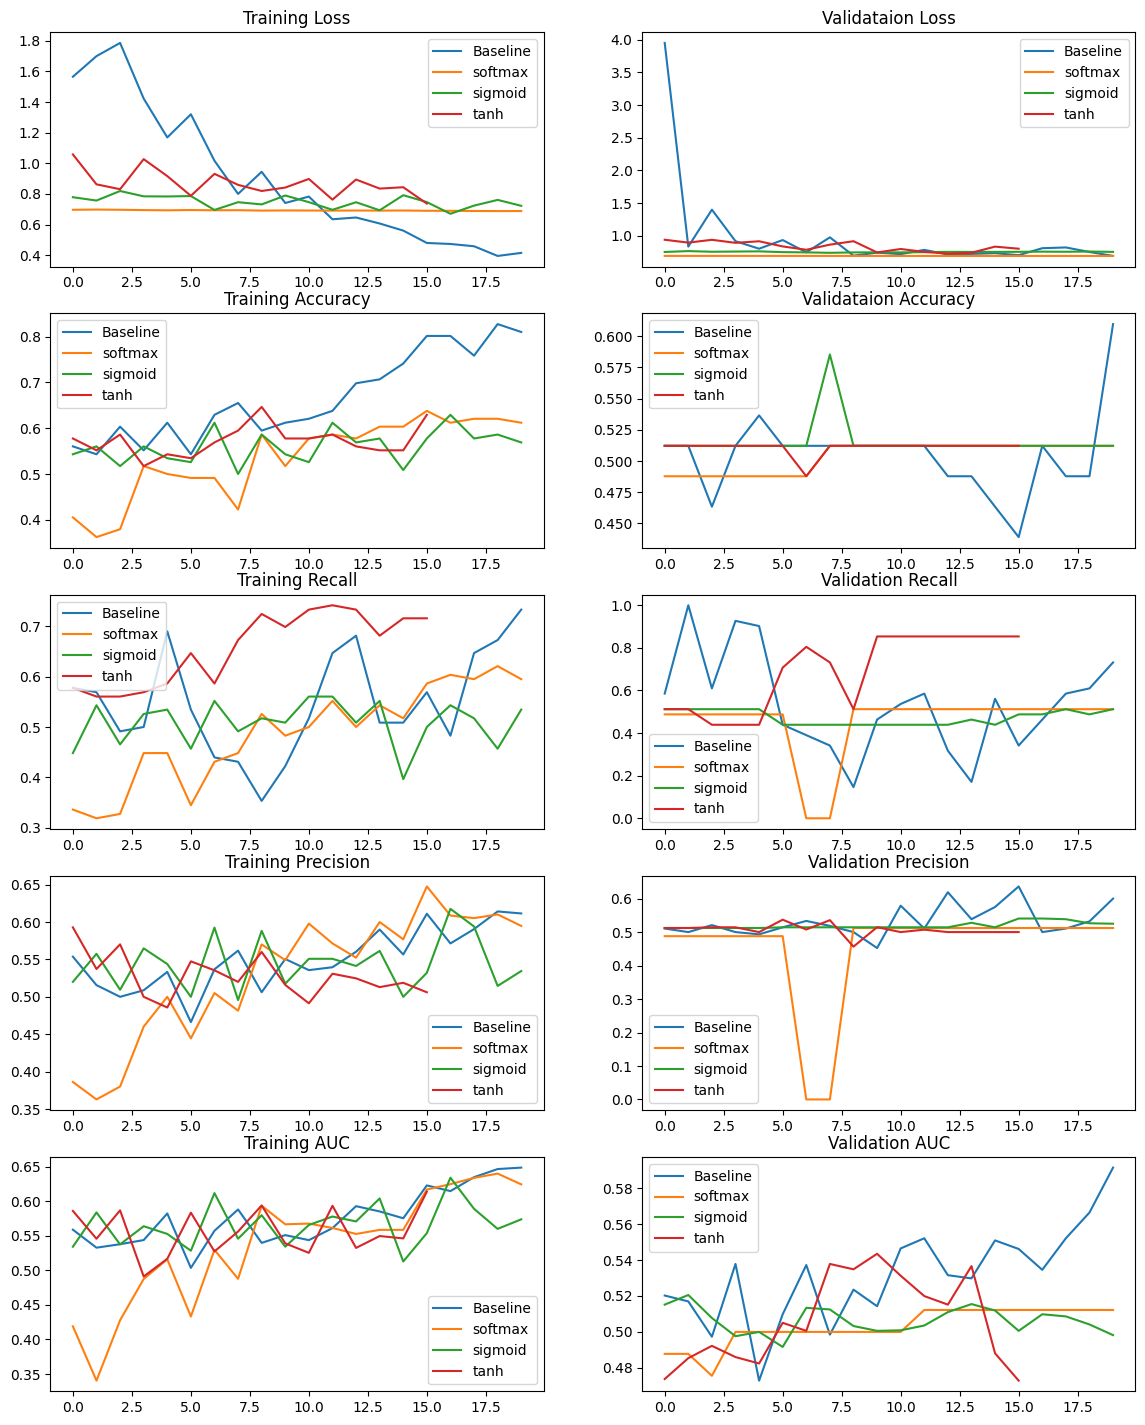

In [ ]:
plot_results(history)

###**Try initializations**

---

In [ ]:
initTypes = ["zeros", "RandomNormal"]  #  Baseline = glorot_uniform
history = baseline.copy()

for i in initTypes:
  model = get_model(width=128, height=128, depth=DEPTH, ini=i)
  h = model.fit(
      x=[train_a_samples, train_b_samples, train_c_samples],
      y=y_train,
      batch_size=8,
      callbacks=[keras.callbacks.EarlyStopping(monitor='val_categorical_accuracy', patience=15)],
      validation_data=([val_a_samples, val_b_samples, val_c_samples], y_val),
      epochs=epochs,
      shuffle=True,
      verbose=2
      )
  history[i] = pd.DataFrame.from_dict(h.history)

Epoch 1/20
15/15 - 4s - loss: 0.6931 - categorical_accuracy: 0.6207 - precision_4: 0.6300 - recall_4: 0.5431 - auc_4: 0.5000 - val_loss: 0.6931 - val_categorical_accuracy: 0.5122 - val_precision_4: 0.5122 - val_recall_4: 0.5122 - val_auc_4: 0.5000
Epoch 2/20
15/15 - 2s - loss: 0.6928 - categorical_accuracy: 0.6207 - precision_4: 0.6207 - recall_4: 0.6207 - auc_4: 0.5000 - val_loss: 0.6931 - val_categorical_accuracy: 0.5122 - val_precision_4: 0.5122 - val_recall_4: 0.5122 - val_auc_4: 0.5000
Epoch 3/20
15/15 - 2s - loss: 0.6923 - categorical_accuracy: 0.6207 - precision_4: 0.6207 - recall_4: 0.6207 - auc_4: 0.5000 - val_loss: 0.6931 - val_categorical_accuracy: 0.5122 - val_precision_4: 0.5122 - val_recall_4: 0.5122 - val_auc_4: 0.5000
Epoch 4/20
15/15 - 2s - loss: 0.6919 - categorical_accuracy: 0.6207 - precision_4: 0.6207 - recall_4: 0.6207 - auc_4: 0.5000 - val_loss: 0.6930 - val_categorical_accuracy: 0.5122 - val_precision_4: 0.5122 - val_recall_4: 0.5122 - val_auc_4: 0.5000
Epoch 5/

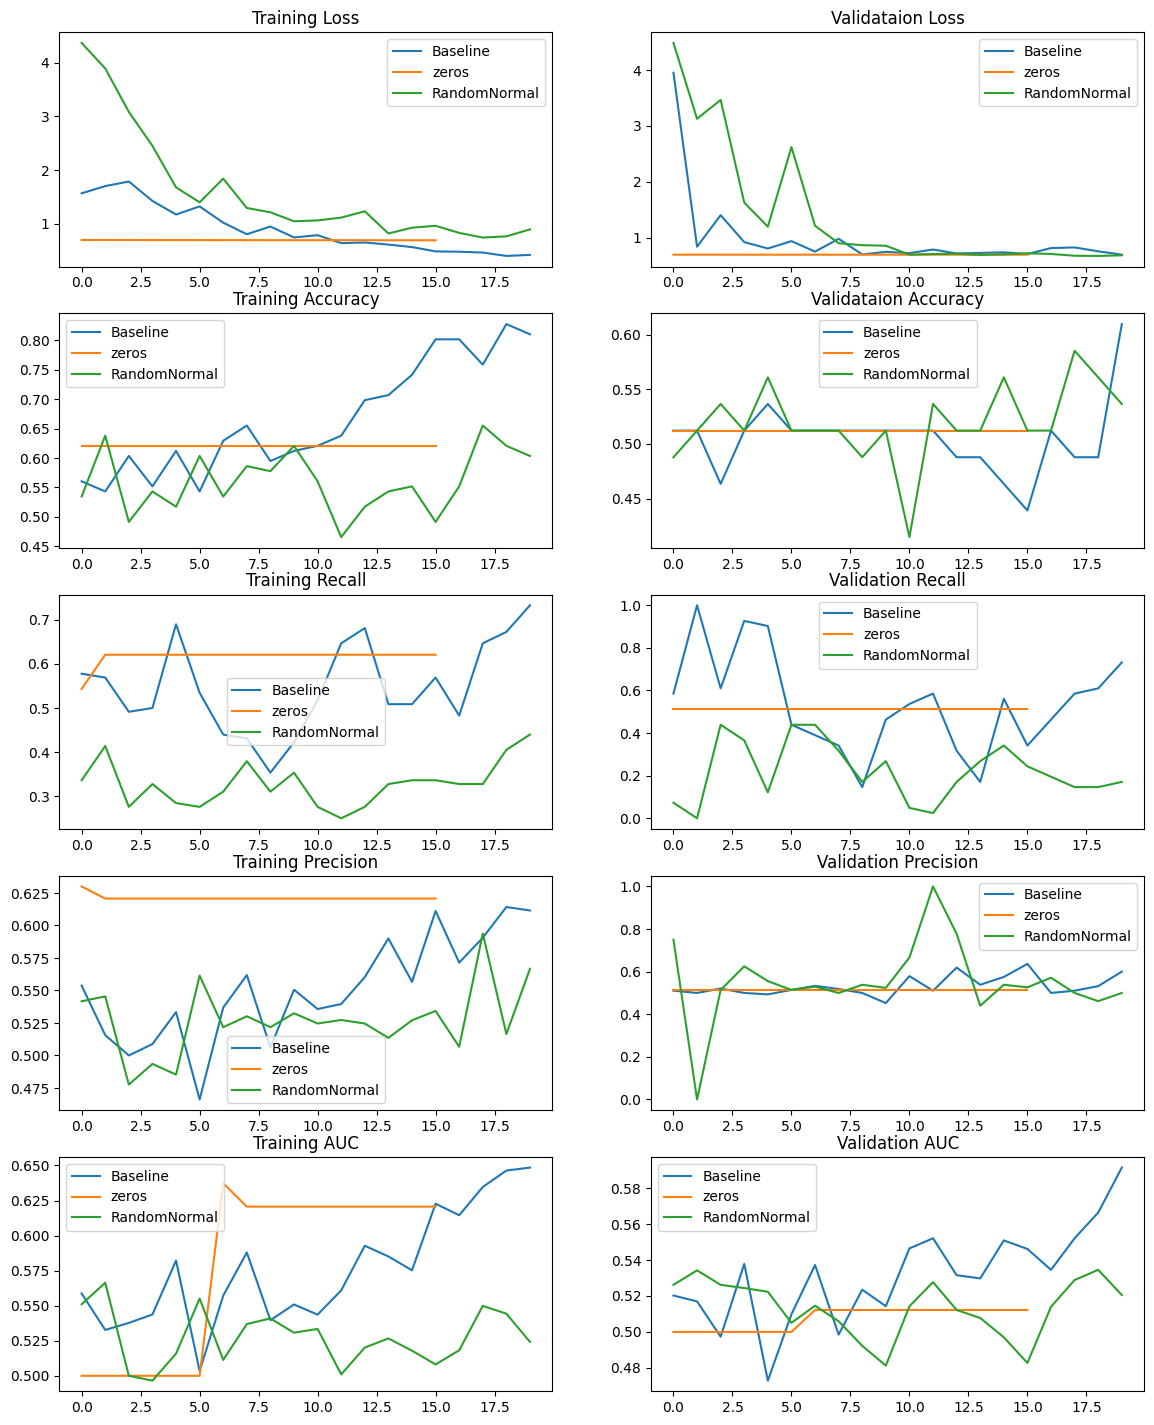

In [ ]:
plot_results(history)

###**Try optimizers**

---

In [ ]:
optimizers = {"Adam": K.optimizers.Adam(learning_rate=1e-4), 
              "Adagrad": K.optimizers.Adagrad(learning_rate=1e-4), 
              "RMSprop": K.optimizers.RMSprop(learning_rate=1e-4)}  # Baseline = SDG
history = baseline.copy()

for name, i in optimizers.items():
  print(f"Training using {name}")
  model = get_model(width=128, height=128, depth=DEPTH, opt=i)
  h = model.fit(
      x=[train_a_samples, train_b_samples, train_c_samples],
      y=y_train,
      batch_size=8,
      callbacks=[keras.callbacks.EarlyStopping(monitor='val_categorical_accuracy', patience=15)],
      validation_data=([val_a_samples, val_b_samples, val_c_samples], y_val),
      epochs=epochs,
      shuffle=True,
      verbose=2
      )
  history[name] = pd.DataFrame.from_dict(h.history)

Training using Adam
Epoch 1/20
15/15 - 4s - loss: 14.6110 - categorical_accuracy: 0.5086 - precision_6: 0.5294 - recall_6: 0.3879 - auc_6: 0.5386 - val_loss: 17.2083 - val_categorical_accuracy: 0.5122 - val_precision_6: 0.5143 - val_recall_6: 0.4390 - val_auc_6: 0.5140
Epoch 2/20
15/15 - 2s - loss: 9.8486 - categorical_accuracy: 0.6207 - precision_6: 0.5211 - recall_6: 0.6379 - auc_6: 0.5366 - val_loss: 7.0151 - val_categorical_accuracy: 0.5122 - val_precision_6: 0.4821 - val_recall_6: 0.6585 - val_auc_6: 0.4845
Epoch 3/20
15/15 - 2s - loss: 9.8763 - categorical_accuracy: 0.5431 - precision_6: 0.5238 - recall_6: 0.6638 - auc_6: 0.5224 - val_loss: 6.2097 - val_categorical_accuracy: 0.5122 - val_precision_6: 0.5161 - val_recall_6: 0.7805 - val_auc_6: 0.4783
Epoch 4/20
15/15 - 2s - loss: 7.4172 - categorical_accuracy: 0.5776 - precision_6: 0.5329 - recall_6: 0.7672 - auc_6: 0.5577 - val_loss: 9.3162 - val_categorical_accuracy: 0.4878 - val_precision_6: 0.5143 - val_recall_6: 0.4390 - val_

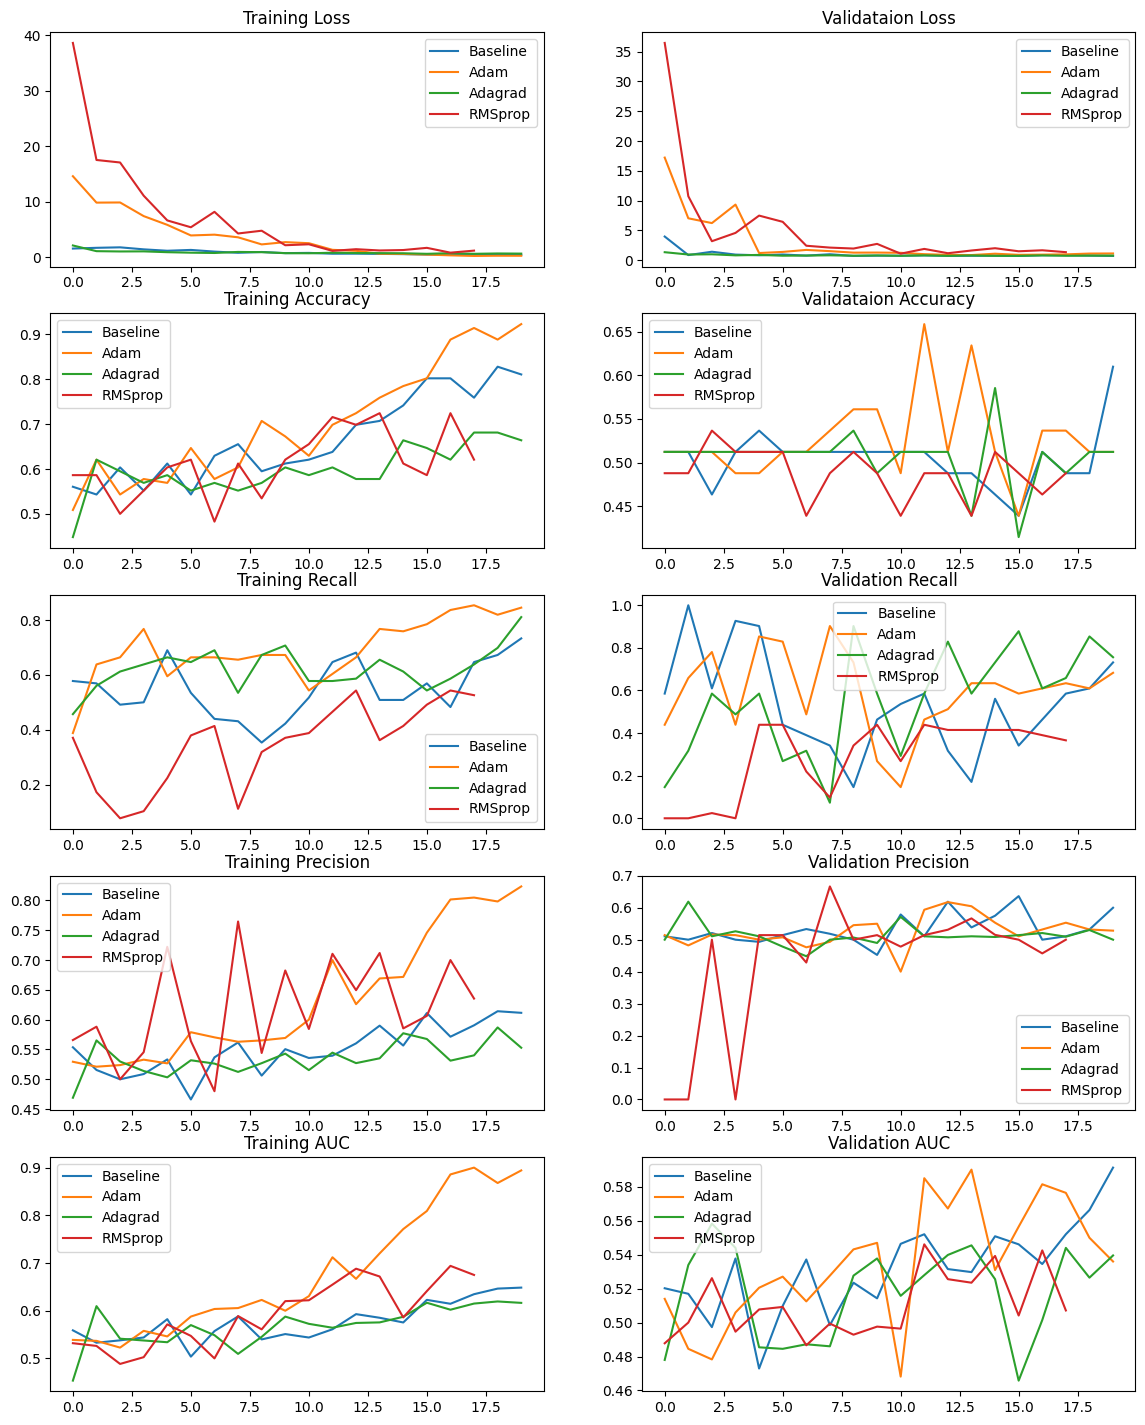

In [ ]:
plot_results(history)

###**Try regularizations**

---

In [ ]:
reg_names = ['1e-5', '1e-2', '1e-1', '1', '1.5']
history = baseline.copy()  # Baseline = no L2 reg

for reg in reg_names:
  model = get_model(width=128, height=128, depth=DEPTH, reg=K.regularizers.l2(float(reg)))
  h = model.fit(
      x=[train_a_samples, train_b_samples, train_c_samples],
      y=y_train,
      batch_size=8,
      callbacks=[keras.callbacks.EarlyStopping(monitor='val_categorical_accuracy', patience=15)],
      validation_data=([val_a_samples, val_b_samples, val_c_samples], y_val),
      epochs=epochs,
      shuffle=True,
      verbose=2
      )
  history[reg] = pd.DataFrame.from_dict(h.history)

Epoch 1/20
15/15 - 6s - loss: 1.6850 - categorical_accuracy: 0.5086 - precision_9: 0.5229 - recall_9: 0.4914 - auc_9: 0.5172 - val_loss: 1.2729 - val_categorical_accuracy: 0.5122 - val_precision_9: 0.5135 - val_recall_9: 0.4634 - val_auc_9: 0.5461
Epoch 2/20
15/15 - 3s - loss: 1.9206 - categorical_accuracy: 0.5603 - precision_9: 0.5000 - recall_9: 0.4310 - auc_9: 0.5236 - val_loss: 0.8596 - val_categorical_accuracy: 0.5366 - val_precision_9: 1.0000 - val_recall_9: 0.0244 - val_auc_9: 0.4720
Epoch 3/20
15/15 - 3s - loss: 1.4057 - categorical_accuracy: 0.5172 - precision_9: 0.4861 - recall_9: 0.3017 - auc_9: 0.5267 - val_loss: 0.7681 - val_categorical_accuracy: 0.5610 - val_precision_9: 0.0000e+00 - val_recall_9: 0.0000e+00 - val_auc_9: 0.5071
Epoch 4/20
15/15 - 3s - loss: 1.5681 - categorical_accuracy: 0.5603 - precision_9: 0.4878 - recall_9: 0.1724 - auc_9: 0.5143 - val_loss: 0.8575 - val_categorical_accuracy: 0.5122 - val_precision_9: 0.0000e+00 - val_recall_9: 0.0000e+00 - val_auc_9:

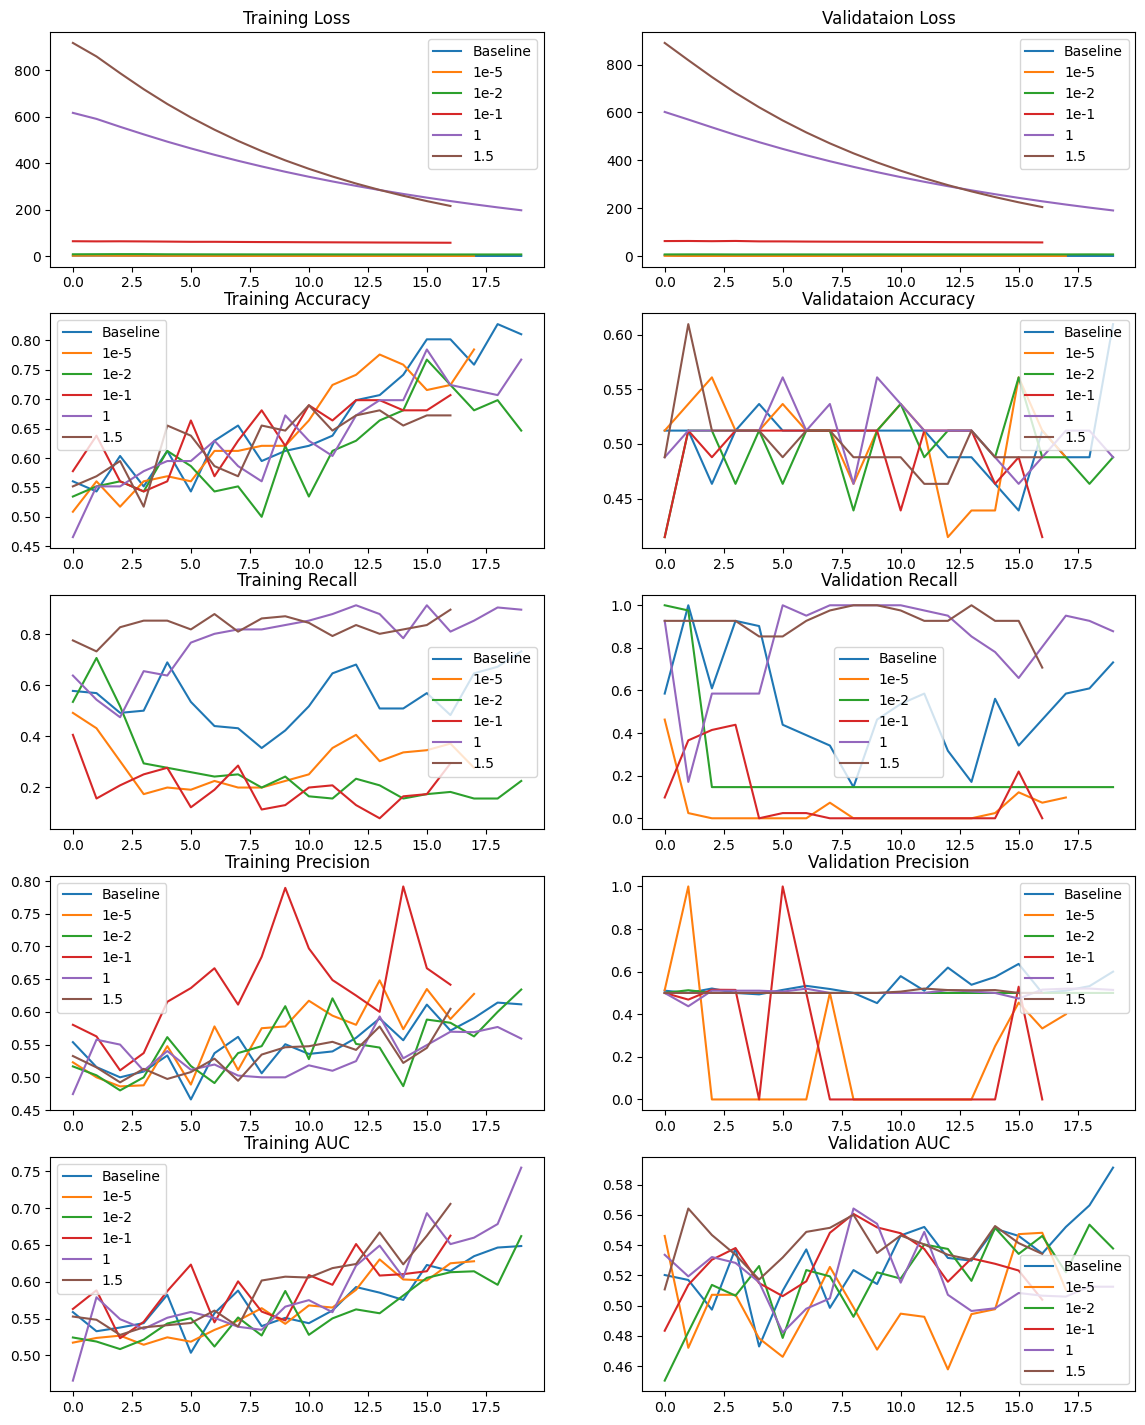

In [ ]:
plot_results(history)

In [ ]:
epochs = 50

model_imp = get_model(width=128, height=128, depth=DEPTH)
                      

improved = model_imp.fit(
      x=[train_a_samples, train_b_samples, train_c_samples],
      y=y_train,
      batch_size=15,
      validation_data=([val_a_samples, val_b_samples, val_c_samples], y_val),
      epochs=epochs,
      shuffle=True,
      verbose=2
      )

Epoch 1/50
8/8 - 4s - loss: 1.1750 - categorical_accuracy: 0.5603 - precision_3: 0.5484 - recall_3: 0.4397 - auc_3: 0.5424 - val_loss: 1.3701 - val_categorical_accuracy: 0.4878 - val_precision_3: 0.4872 - val_recall_3: 0.4634 - val_auc_3: 0.4988
Epoch 2/50
8/8 - 2s - loss: 1.7439 - categorical_accuracy: 0.5862 - precision_3: 0.5455 - recall_3: 0.3103 - auc_3: 0.5282 - val_loss: 1.9195 - val_categorical_accuracy: 0.4878 - val_precision_3: 0.0000e+00 - val_recall_3: 0.0000e+00 - val_auc_3: 0.5131
Epoch 3/50
8/8 - 2s - loss: 1.5469 - categorical_accuracy: 0.5431 - precision_3: 0.5278 - recall_3: 0.1638 - auc_3: 0.5417 - val_loss: 0.6909 - val_categorical_accuracy: 0.5610 - val_precision_3: 0.0000e+00 - val_recall_3: 0.0000e+00 - val_auc_3: 0.4958
Epoch 4/50
8/8 - 2s - loss: 1.0713 - categorical_accuracy: 0.5431 - precision_3: 0.5417 - recall_3: 0.1121 - auc_3: 0.5339 - val_loss: 0.9461 - val_categorical_accuracy: 0.5122 - val_precision_3: 0.0000e+00 - val_recall_3: 0.0000e+00 - val_auc_3:

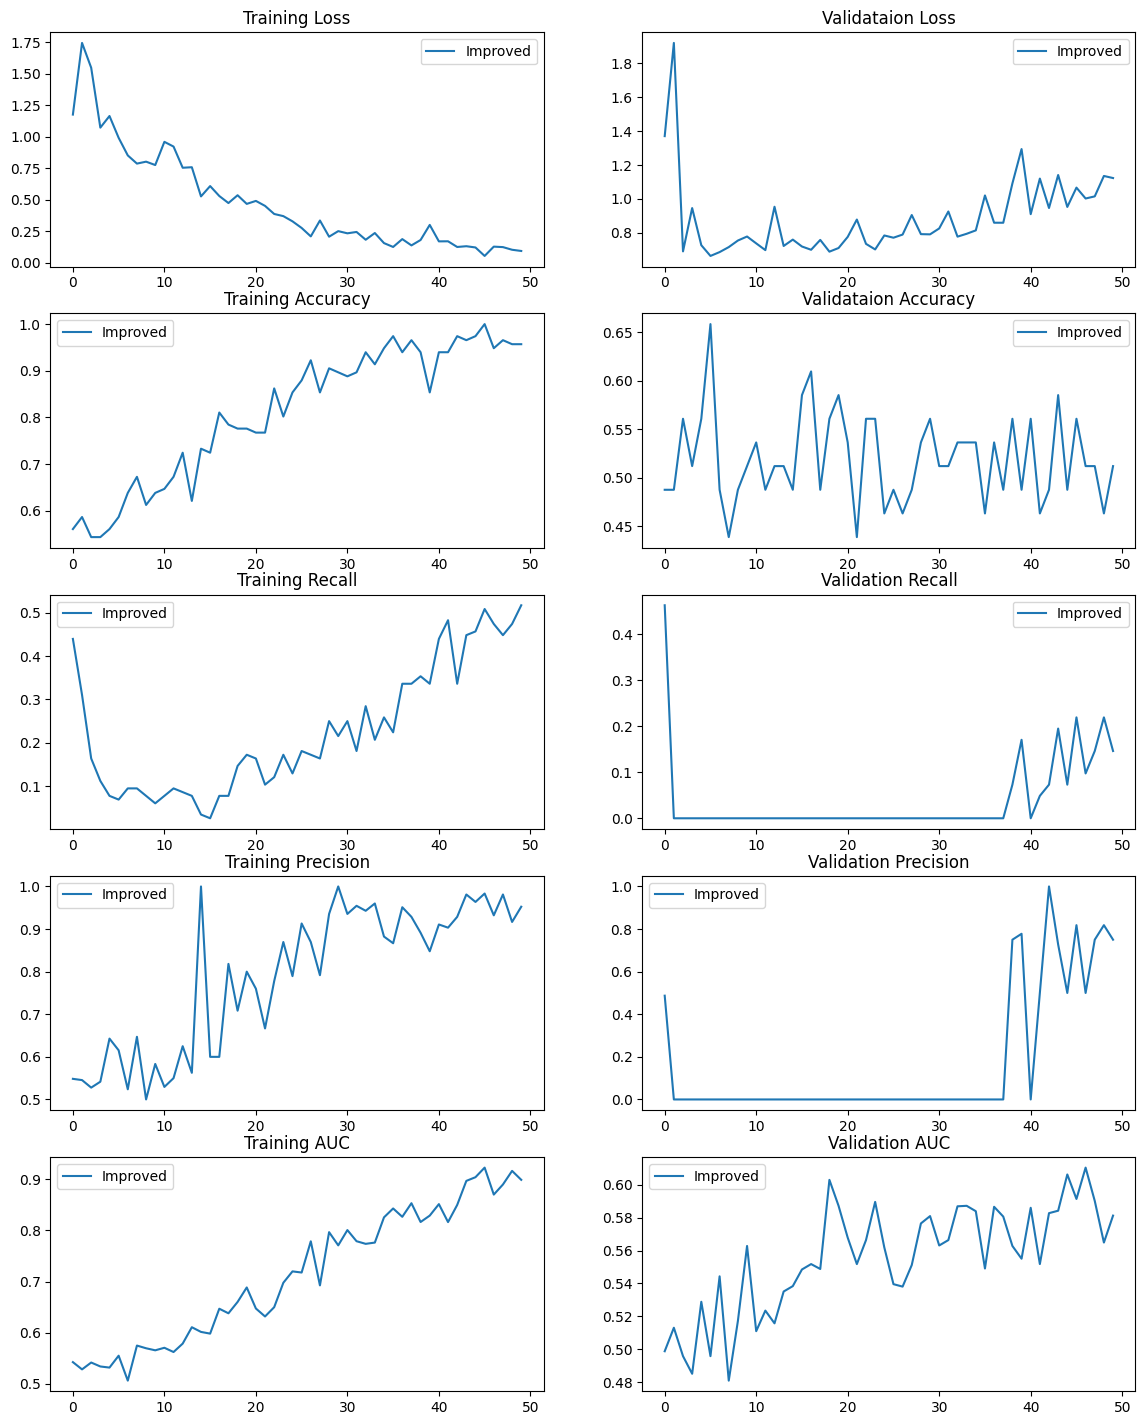

In [ ]:
history =  {"Improved": pd.DataFrame.from_dict(improved.history)}
plot_results(history)

In [ ]:
model.evaluate(x=[test_a_samples, test_b_samples, test_c_samples], y=y_test)

2/2 [==============================] - 0s 54ms/step - loss: 42.4682 - categorical_accuracy: 0.7750 - precision: 0.7500 - recall: 0.1500 - auc: 0.5394


[42.46818542480469,
 0.7749999761581421,
 0.75,
 0.15000000596046448,
 0.5393750667572021]